In [1]:
#util
import os
import time

#Math/arrays
import numpy as np
import pandas as pd

import optimizationFuncs as optim
import cpso
from importlib import reload

# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 

#File io
#from Bio.PDB import *
from loadFile import *
from makePDB import *

#PSO
from threeDMaxGrad import *
from myUtils import *
# Import PySwarms
import pyswarms as ps
import numpy.random as random

%load_ext autoreload
%autoreload 2

In [2]:
#==========================================================================
# Make directory if it doesn't exist
#--------------------------------------------------------------------------
if not os.path.exists('my_folder'):
    os.makedirs('my_folder')

In [3]:
## constants
inFile = "../../examples/input/chr19.txt"
## load file 
lstCons=loadFile.loadFileFunc(inFile)


this is a sparse matrix
Number of points :  948
numBins  59.0


In [4]:
lstCons

array([[ 0.       ,  1.       ,  7.321659 ],
       [ 0.       , 51.       ,  1.8995112],
       [ 0.       , 53.       ,  2.5754905],
       ...,
       [57.       , 59.       ,  4.9063144],
       [57.       , 58.       , 23.9648   ],
       [58.       , 59.       , 13.488014 ]])

In [5]:
class outputObj:
    def __init__(self, xyzData, outputFile):
        self.xyzData = xyzData
        self.outputFile = outputFile
        
        #defaults
        self.recordName = []
        for i in range(len(xyzData)):
            self.recordName.append('ATOM')
            

    def myfunc(self):
        print("Hello my name is David")

In [6]:
def cost(xOyOz):
    cost = 0
    d = 0;
    structure = variables;
    

    #loop through existing data
    for k in range(len(lstCons)):
        print("yo2", lstCons)
        i = int(lstCons[k,0]);    j = int(lstCons[k,1]);    IF = lstCons[k,2];  dist = lstCons[k,3];
        
        if (IF <= 0) :
            continue
        

        if (abs(i - j) == 1 ) :
            IF = 1.0 * maxIF

        x1=structure[i][0];  x2=structure[j][0];
        y1=structure[i][1];  y2=structure[j][1];
        z1=structure[i][2];  z2=structure[j][2];

        str_dist = threeDMaxGrad.calEuclidianDist(threeDMaxGrad(), x1,y1,z1,x2,y2,z2 );     

        z = str_dist - dist;

        # objective function       
        d += (z**2);     

        print(d)

        # cost
        cost = -(n/2) - (n*np.log(np.sqrt(d/n)));

        return cost

In [7]:
def opt_func(X):
    n_particles = X.shape[0]  # number of particles
    target = np.array([-2,2,3])
    
    d = 0;
    #print(X)


    structure = variables #this is xyz
    allDists = np.zeros(n_particles)
    
    for particle in range(n_particles):
        structure[:,changedXYZ] = X[particle]
        
        
        #loop through existing data
        for k in range(len(lstCons)):
            #print("yo2", lstCons)
            i = int(lstCons[k,0]);    j = int(lstCons[k,1]);    IF = lstCons[k,2];  dist = lstCons[k,3];
            if (IF <= 0) :
                continue


            if (abs(i - j) == 1 ) :
                IF = 1.0 * maxIF

            x1=structure[i][0];  x2=structure[j][0];
            y1=structure[i][1];  y2=structure[j][1];
            z1=structure[i][2];  z2=structure[j][2];

            str_dist = threeDMaxGrad.calEuclidianDist(threeDMaxGrad(), x1,y1,z1,x2,y2,z2 );     

            z = str_dist - dist;

            # objective function       
            d += (z**2);  
        
        allDists[particle] = d
    
    return allDists

In [20]:
def opt_func(X):
    n_particles = X.shape[0]  # number of particles
    target = np.array([-2,2,3])
    
    d = 0;
    #print(X)


    structure = variables #this is xyz
    allDists = np.zeros(n_particles)
    
    for particle in range(n_particles):
        structure[:,changedXYZ] = X[particle]
        
        
        #loop through existing data
        for k in range(len(lstCons)):
            #print("yo2", lstCons)
            i = int(lstCons[k,0]);    j = int(lstCons[k,1]);    IF = lstCons[k,2];  dist = lstCons[k,3];
            if (IF <= 0) :
                continue


            if (abs(i - j) == 1 ) :
                IF = 1.0 * maxIF

            x1=structure[i][0];  x2=structure[j][0];
            y1=structure[i][1];  y2=structure[j][1];
            z1=structure[i][2];  z2=structure[j][2];

            str_dist = threeDMaxGrad.calEuclidianDist(threeDMaxGrad(), x1,y1,z1,x2,y2,z2 );     

            z = str_dist - dist;

            # objective function       
            d += (z**2);  
        
        allDists[particle] = d
    
    return allDists

In [21]:
## this is convert to distance
#CONVERT_FACTOR_R = np.arange(0.1, 2, .2) # this is alpha and can be looped
CONVERT_FACTOR_R=[0.3]
MAX_ITERATION = 500; # maximum number of iterations

AVG_DIST = 10.0  # an arbitrary distance

n=int(max(max(lstCons[:,0]),max(lstCons[:,1])))+1
print("n = ",n)

bestAlpha= CONVERT_FACTOR_R[0]
lstConsReset = lstCons
for CONVERT_FACTOR in CONVERT_FACTOR_R : 
    lstCons = lstConsReset
    ## Find the average IF
    avgIF = 0.0
    for i in range(len(lstCons)):
        avgIF = avgIF + float(lstCons[i][2])
    avgIF = avgIF/len(lstCons)
    
    maxIF = 0.0
    ## scale average distance to AVG_DIST
    avgDist = 10.0;
    avgAdjIF = 0.0;
    avgAdjCount = 0;
    totalIF = 0;

    for i in range(len(lstCons)):
        x = lstCons[i][0]
        y = lstCons[i][1]
        IF = lstCons[i][2]
        lstCons[i][2] = IF / avgIF  # normallize IF by avgIF
        IF = lstCons[i][2]
        dist = 1/(IF**CONVERT_FACTOR)
        avgDist = avgDist + dist

        totalIF = totalIF +  IF

        if ( IF > maxIF):
            maxIF = lstCons[i][2]
        # Find the adjacent position IF
        if ( abs(x-y)==1):
            avgAdjCount= avgAdjCount+1
            avgAdjIF =  avgAdjIF + IF

    avgDist = avgDist/len(lstCons)
    avgAdjIF = avgAdjIF/avgAdjCount

    maxIF = min(avgAdjIF, maxIF)

    ## TODO Add adjacent if none exist
    i = 0
    
    print('TODO Added missing adjacent constraint...')

    print('Number of constraints: = ', n)
    maxD = 0
    distResultsList= []
    for i in range(len(lstCons)):
        IF = lstCons[i,2];
        dist = AVG_DIST/ ((IF**CONVERT_FACTOR)* avgDist)
        distResultsList.append(dist)
        if (dist > maxD):
            maxD = dist;

    result = np.hstack((lstCons, np.atleast_2d(distResultsList).T))
    lstCons = result
    print('Max distance is: = \n', maxD); 
    
    ## Optimization
    ## Initialize Structure
    #=========================================================================
    
    smooth_factor = 1e-6 ; # for numerical stability
    LEARNING_RATE = 0.1; # Specify the learning rate
    NEAR_ZERO =0.00001; # used to signify a boundary of convergence
    NUM_FIGURES_OUTPUT=5

    thisStr =  [];
    R = [-0.5,0.5];
    for i in range(n):
        xyz = np.array([random.random(),random.random(),random.random()]) * (R[1]-R[0]) + min(R) 
        thisStr.append(xyz)
    
    ## Variables declaration
    #=========================================================================
    thislen = len(lstCons)

    Sum_Grad = np.zeros(n);
    variables = thisStr;
    oldobj = 0;
    
    ######### PSO
    variables = np.array(variables)

    dist = 1/(IF**CONVERT_FACTOR)

    swarm_size = 20
    dim = n       # Dimension of X
    epsilon = 1
    options = {'c1': 0.5, 'c2':0.3, 'w':0.9}
    MAX_ITERATION = 500; # maximum number of iterations



    # Call an instance of PSO
    optimizer = ps.single.GlobalBestPSO(n_particles=swarm_size,
                                    dimensions=dim,
                                    options=options)


    # Perform optimization
    for i in range(10):
        changedXYZ = np.random.randint(2)
        cost, bestPXYZ = optimizer.optimize(opt_func, iters=15)   
        variables[:,changedXYZ] = bestPXYZ
        
        
    

    #========================================================================
    # scoring using spearman correlation, pearson correlation and  RMSD     
    #------------------------------------------------------------------------
    # calculate rmse    
    SUM = 0.0;

    Len = int(n * (n - 1) / 2) 
    Dist = np.zeros(Len);
    WishDist = np.zeros(Len);
    count = 1;
    structure = variables;
    for k in range(len(lstCons)):
        i = int(lstCons[k,0]);    j = int(lstCons[k,1]);    IF = lstCons[k,2];  dist = lstCons[k,3];
        # structure distance   
        x1=structure[i][0];  x2=structure[j][0];
        y1=structure[i][1];  y2=structure[j][1];
        z1=structure[i][2];  z2=structure[j][2];

        str_dist = threeDMaxGrad.calEuclidianDist(threeDMaxGrad(), x1,y1,z1,x2,y2,z2 );
        SUM = SUM + ((str_dist - dist)**2);

        # calculate spearman_correlation and Pearson correlation
        if (i != j and IF > 0 and count<=Len  ):   
            Dist[count] = str_dist;
            WishDist[count]= dist;
            count = count + 1

    SUM = SUM / len(lstCons);    
    rmse = np.sqrt(SUM);

    # let's convert to a dataframe
    df = pd.DataFrame({'Dist': Dist, 'wishDist': WishDist})
    pearsonCoeff = df.corr(method = 'pearson')
    spearmanCoeff = df.corr(method = 'spearman')
   
    if CONVERT_FACTOR == CONVERT_FACTOR_R[0]:#first run
        bestSpearmanRHO = spearmanCoeff.iloc[0]['wishDist']
        bestPearsonRHO = pearsonCoeff.iloc[0]['wishDist']
        bestMat =  variables
    elif bestSpearmanRHO < spearmanCoeff.iloc[0]['wishDist']:
        bestSpearmanRHO = spearmanCoeff.iloc[0]['wishDist']
        bestPearsonRHO = pearsonCoeff.iloc[0]['wishDist']
        bestMat =  variables
        bestAlpha = CONVERT_FACTOR

print("RMSE  : ", rmse)    
print("bestPearsonRHO  : ", bestPearsonRHO) 
print("bestSpearmanRHO  : ", bestSpearmanRHO) 
print("Best Alpha : ",bestAlpha)

2020-11-22 15:12:33,596 - pyswarms.single.global_best - INFO - Optimize for 15 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:  13%|█▎        |2/15, best_cost=7.91e+4

n =  60
TODO Added missing adjacent constraint...
Number of constraints: =  60
Max distance is: = 
 15.040422016741443


pyswarms.single.global_best: 100%|██████████|15/15, best_cost=5.76e+4
2020-11-22 15:12:35,020 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 57580.21429609057, best pos: [4.92065383 2.03202182 0.59709307 4.84673284 6.59241397 3.10138998
 1.18974971 5.32893849 2.28236    6.13103077 1.04249198 1.8773646
 3.27546828 1.04027328 6.18673372 5.10521906 3.97219026 7.48566132
 6.27389564 4.70637469 2.52762368 6.54175407 3.39283555 3.32261372
 4.61374736 2.81613011 1.66620808 3.09756508 6.8268745  3.2549593
 1.33435456 4.87467283 6.31043642 2.81330822 4.40027977 3.38404801
 2.94303038 7.12737834 6.83129081 1.41003253 6.35988156 2.1183163
 5.46144095 2.00899432 1.75509594 5.76170867 2.82528438 4.78088574
 3.89204476 1.72052149 2.18080574 5.76815643 2.93715988 5.67261189
 6.71427976 4.82799922 6.41603069 2.24356875 5.01756934 4.5694793 ]
2020-11-22 15:12:35,022 - pyswarms.single.global_best - INFO - Optimize for 15 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.sin

RMSE  :  6.869889232713078
bestPearsonRHO  :  0.6786046097729943
bestSpearmanRHO  :  0.8484566667339317
Best Alpha :  0.3


In [9]:
#========================================================================
# create pdb
#------------------------------------------------------------------------
#Increase structure Size

xyz4pdb = myUtils.convert2xyz(myUtils(), n, bestMat) 
scale=100/np.amax(xyz4pdb)
xyz4pdb = xyz4pdb* scale
#output pdb file
outputData= np.round_(xyz4pdb ,3 )

outputFile = 'yolo.pdb' #output directory.


if os.path.exists(outputFile):
    os.remove(outputFile)

output = outputObj(outputData,outputFile)

pdbMaker = makePDB()
makePDB.mat2pdb(pdbMaker, output) # Converts the mat XYZ coordinates to PDB format.

outputting PDB in file :  yolo.pdb
done! closing file...



In [10]:
print("\n\n",bestAlpha)



 0.3


In [11]:
spearmanCoeff.iloc[0]['wishDist']

0.8577993769082354

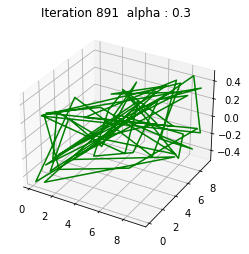

In [17]:
#visualize structure MAX 20
titleStr = 'Iteration ' + str(count) + '  alpha : ' + str(CONVERT_FACTOR);
xyzNew = myUtils.convert2xyz(myUtils(), n,variables);
fig = plt.figure()
fig.clear(True) 

ax = plt.axes(projection ='3d') 
ax.plot(xyzNew[:,0],xyzNew[:,1],xyzNew[:,2], 'green');
plt.title(titleStr)
plt.show()

In [18]:
xyzNew

array([[ 4.27648510e+00,  4.27655977e+00, -2.35158475e-02],
       [ 7.06777244e-01,  7.06618241e-01, -2.99786107e-01],
       [ 7.18190876e+00,  7.18184834e+00,  4.12055774e-01],
       [ 4.24293244e+00,  4.24294214e+00,  3.98196913e-01],
       [ 8.00997050e+00,  8.00952027e+00,  3.19132765e-01],
       [ 1.43169472e+00,  1.43165488e+00, -1.99984442e-01],
       [ 7.34101075e+00,  7.34098350e+00,  3.27445609e-01],
       [ 9.44130242e-01,  9.44132511e-01, -3.79848071e-01],
       [ 1.99241954e+00,  1.99243778e+00,  1.88208504e-01],
       [ 3.71903638e+00,  3.71900827e+00, -1.76064826e-01],
       [ 5.58232414e+00,  5.58230588e+00,  4.93577948e-01],
       [ 4.35910855e+00,  4.35936866e+00,  1.52617926e-01],
       [ 8.73151835e+00,  8.73147742e+00, -3.52486975e-01],
       [ 6.92843991e+00,  6.92846256e+00, -1.82093383e-01],
       [ 7.72714302e+00,  7.72711213e+00,  4.60547850e-01],
       [ 2.82272313e+00,  2.82275721e+00,  1.76408931e-01],
       [ 8.96953914e+00,  8.96953358e+00